In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_context("notebook")  # make figures fit
from pylab import rcParams
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from IPython.display import Image
from IPython.core.display import HTML 
import sklearn as sk
import sklearn.cluster as skc
import sklearn.decomposition as skd
import sklearn.manifold as skm
import sklearn.preprocessing as skp

# Part 1 - EDA of Coninuous Variables

In [312]:
data=pd.read_csv('KaggleV2-May-2016.csv/KaggleV2-May-2016.csv')

In [612]:
data=data.rename(index=str, columns={'Hipertension':'Hypertension'})
len(data)
len(data[data['no_show']==0])/len(data)

0.798067440534892

In [316]:
data['ScheduledDay']=pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay']=pd.to_datetime(data['AppointmentDay'])

In [317]:
data['wait_time']=(data.AppointmentDay - data.ScheduledDay).astype('timedelta64[D]')

In [318]:
data['wait_time']=data['wait_time'].apply(lambda x: 0.0 if x<0 else x)

In [319]:
# Make column for day of the week appointment day is on
# Make column for day of the week of scheduled day
# Make column for time of day of scheduled day

data['day_week_appt']=data2.AppointmentDay.apply(lambda x: x.weekday_name)
data['day_week_sched']=data2.ScheduledDay.apply(lambda x: x.weekday_name)
data['hour_of_day_sched']=data2.ScheduledDay.apply(lambda x: x.hour)

In [320]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,wait_time,day_week_appt,day_week_sched,hour_of_day_sched
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0.0,Friday,Friday,18
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0.0,Friday,Friday,16
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0.0,Friday,Friday,16
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0.0,Friday,Friday,17
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0.0,Friday,Friday,16


In [321]:
def multiplePlots( series , title):
    
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.5, w_pad=4, h_pad=2.0)
    fig.suptitle(title)

    # Histogram
    sns.distplot(series, ax=axs[0,0])
    
    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current,lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")
    
    # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(xr,qntls, ax=axs[1,0])
    
    # Run sequence
    ax = sns.regplot(np.arange(len(series)),series, ax=axs[1,1])
    ax.set_ylabel("val")
    ax.set_xlabel("i")
    
    plt.subplots_adjust(top=0.9)


In [322]:
no_shows=data[data['No-show']=='Yes']
shows=data[data['No-show']=='No']

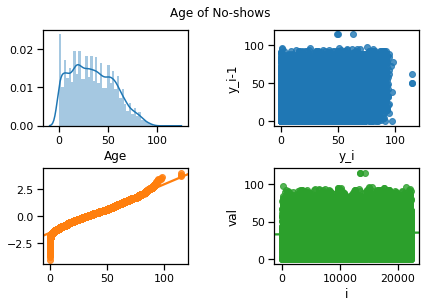

In [323]:
multiplePlots(no_shows['Age'], 'Age of No-shows')

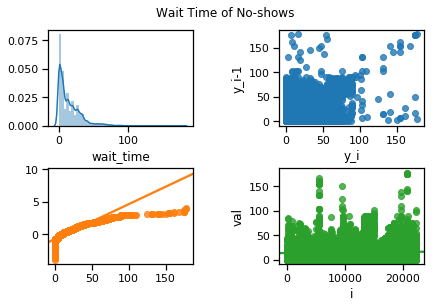

In [324]:
multiplePlots(no_shows['wait_time'],'Wait Time of No-shows')

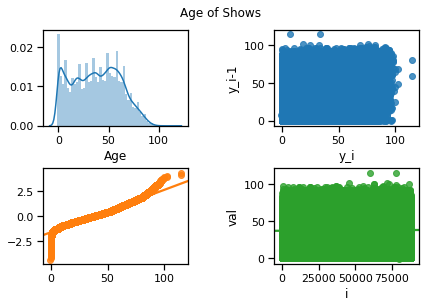

In [325]:
multiplePlots(shows['Age'], 'Age of Shows')

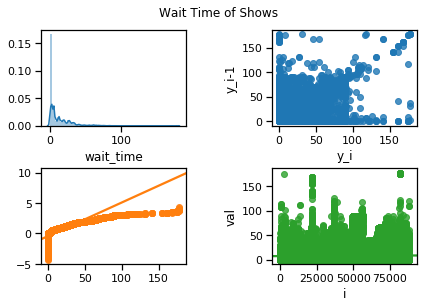

In [326]:
multiplePlots(shows['wait_time'], 'Wait Time of Shows')

In [328]:
data.rename(index=str, columns={"No-show": "no_show"},inplace=True)

In [329]:
model=smf.ols('Age ~ no_show', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Age   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     403.6
Date:                Wed, 12 Dec 2018   Prob (F-statistic):           1.32e-89
Time:                        01:24:34   Log-Likelihood:            -5.0371e+05
No. Observations:              110527   AIC:                         1.007e+06
Df Residuals:                  110525   BIC:                         1.007e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         37.7901      0.078    486.539      0.000      37.638      37.942
no_show[T.Yes]    -3.4724      0.173    -20.090      0.000      -3.811      -3.134
==============================================================================
Omnibus:                    18548.621   Durbin-Watson:                   1.165
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4284.977
Skew:                           0.114   Prob(JB):                         0.00
Kurtosis:                       2.063   Cond. No.                         2.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The older you are, the more likely you will attend your appointment

In [330]:
model2=smf.ols('wait_time ~ no_show', data=data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              wait_time   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     3704.
Date:                Wed, 12 Dec 2018   Prob (F-statistic):               0.00
Time:                        01:24:35   Log-Likelihood:            -4.5453e+05
No. Observations:              110527   AIC:                         9.091e+05
Df Residuals:                  110525   BIC:                         9.091e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.1715      0.050    164.180      0.000       8.074       8.269
no_show[T.Yes]     6.7409      0.111     60.861      0.000       6.524       6.958
==============================================================================
Omnibus:                    68842.588   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           940754.903
Skew:                           2.809   Prob(JB):                         0.00
Kurtosis:                      16.142   Cond. No.                         2.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The longer your wait time, the more likely you are to be a no-show

# Part 2 - EDA of Categorical Variables

In [331]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,wait_time,day_week_appt,day_week_sched,hour_of_day_sched
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0.0,Friday,Friday,18
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0.0,Friday,Friday,16
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0.0,Friday,Friday,16
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0.0,Friday,Friday,17
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0.0,Friday,Friday,16


In [332]:
# # Gender: M=0, F=1
# data.Gender.replace('M', 0,inplace=True)
# data.Gender.replace('F',1,inplace=True)
# data.no_show.replace('No',0,inplace=True)
# data.no_show.replace('Yes',1,inplace=True)


In [333]:
data_cat=data.filter(['Gender',
                      'Scholarship',
                      'Hypertension',
                      'Diabetes',
                      'Neighbourhood',
                      'Alcoholism',
                      'Handcap',
                      'SMS_received',
                      'day_week_appt',
                      'day_week_sched',
                      'hour_of_day_sched',
                      'no_show'])
data_cat.head()

,Gender,Scholarship,Hypertension,Diabetes,Neighbourhood,Alcoholism,Handcap,SMS_received,day_week_appt,day_week_sched,hour_of_day_sched,no_show
0,F,0,1,0,JARDIM DA PENHA,0,0,0,Friday,Friday,18,No
1,M,0,0,0,JARDIM DA PENHA,0,0,0,Friday,Friday,16,No
2,F,0,0,0,MATA DA PRAIA,0,0,0,Friday,Friday,16,No
3,F,0,0,0,PONTAL DE CAMBURI,0,0,0,Friday,Friday,17,No
4,F,0,1,1,JARDIM DA PENHA,0,0,0,Friday,Friday,16,No


chi2 =  1.8534369792394627
p-val =  0.17338418189785987
degree of freedom =  1
Expected:


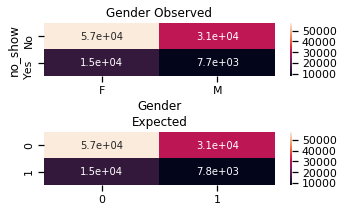

In [337]:
def heat_comp( series):
    
    fig, axs = plt.subplots(2)
    plt.tight_layout(pad=5, w_pad=2, h_pad=3.0)
    
    ct=pd.crosstab(data_cat.no_show, data_cat['{}'.format(series)])
    sns.heatmap(ct,annot=True,ax=axs[0]).set_title('{} Observed'.format(series))
    from scipy.stats import chi2_contingency
    chi2, p, dof, ex = chi2_contingency(ct)
    print("chi2 = ", chi2)
    print("p-val = ", p)
    print("degree of freedom = ",dof)
    print("Expected:")
    pd.DataFrame(ex)
    sns.heatmap(ex,annot=True, ax=axs[1]).set_title('Expected')
heat_comp('Gender')

No significant difference between observed and expected counts for gender by no-show status

chi2 =  93.57719729532182
p-val =  3.906624913845394e-22
degree of freedom =  1
Expected:


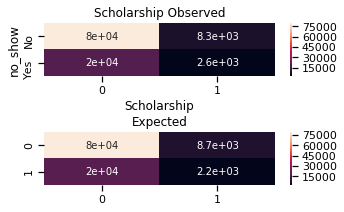

In [338]:
heat_comp('Scholarship')

Significantly more no-shows for patients eligible for scholarship (similar to welfare eligibility) 

chi2 =  140.6514430050126
p-val =  1.9176109238263203e-32
degree of freedom =  1
Expected:


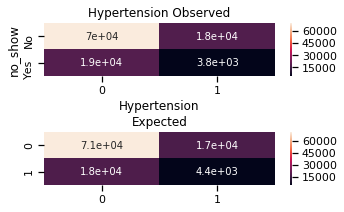

In [339]:
heat_comp('Hypertension')

Those with hypertension more likely to go to appt. 

chi2 =  25.322609491076037
p-val =  4.849904575233736e-07
degree of freedom =  1
Expected:


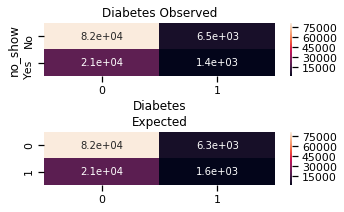

In [340]:
heat_comp('Diabetes')

Those with diabetes more likely to show up to appt.

chi2 =  0.0018796207361593989
p-val =  0.9654188731603915
degree of freedom =  1
Expected:


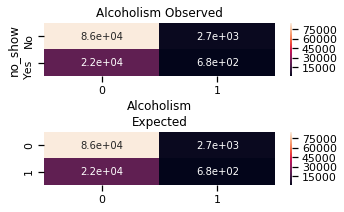

In [341]:
heat_comp('Alcoholism')

No significant difference in no-show rates based on alcoholism

chi2 =  7.034583708655519
p-val =  0.1340718823629825
degree of freedom =  4
Expected:


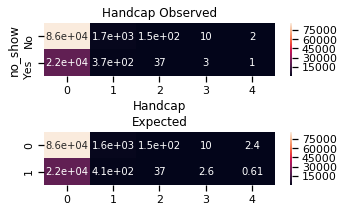

In [342]:
heat_comp('Handcap')

No significant difference between observed and expected values in no-show rate based on handicap status

chi2 =  1766.0676572637585
p-val =  0.0
degree of freedom =  1
Expected:


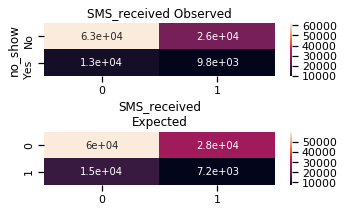

In [343]:
heat_comp('SMS_received')

Significant difference between observed and expected counts of no-shows based on SMS-received status. Infer that those who received SMS are significantly less likely to show up

chi2 =  491.92786949651384
p-val =  1.5424359262217237e-60
degree of freedom =  80
Expected:


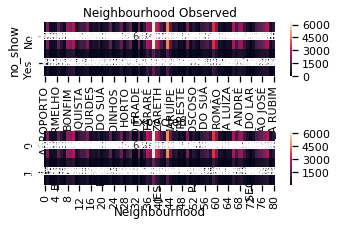

In [344]:
heat_comp('Neighbourhood')

chi2 =  27.468510174356098
p-val =  4.622523600571694e-05
degree of freedom =  5
Expected:


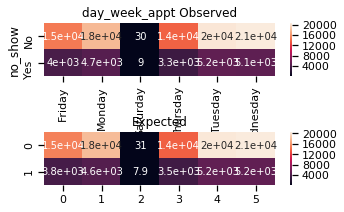

In [345]:
heat_comp('day_week_appt')

chi2 =  9.029456654071677
p-val =  0.10789498364057512
degree of freedom =  5
Expected:


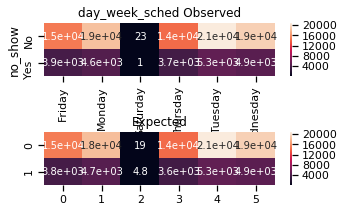

In [346]:
heat_comp('day_week_sched')

chi2 =  576.4171673624799
p-val =  3.61772954940658e-113
degree of freedom =  15
Expected:


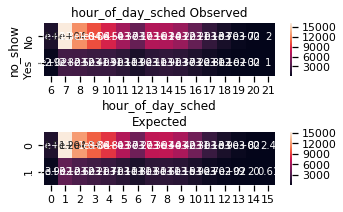

In [347]:
heat_comp('hour_of_day_sched')

# Part 3 - Dimensionality Reduction using PCA

In [473]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,wait_time,day_week_appt,day_week_sched,hour_of_day_sched
0,2.987250e+13,5642903,1,2016-04-29 18:38:08,2016-04-29,62,1,0,1,0,0,0,0,0,0.0,5,5,18
1,5.589978e+14,5642503,0,2016-04-29 16:08:27,2016-04-29,56,1,0,0,0,0,0,0,0,0.0,5,5,16
2,4.262962e+12,5642549,1,2016-04-29 16:19:04,2016-04-29,62,2,0,0,0,0,0,0,0,0.0,5,5,16
3,8.679512e+11,5642828,1,2016-04-29 17:29:31,2016-04-29,8,3,0,0,0,0,0,0,0,0.0,5,5,17
4,8.841186e+12,5642494,1,2016-04-29 16:07:23,2016-04-29,56,1,0,1,1,0,0,0,0,0.0,5,5,16


In [474]:
print(data.day_week_appt.unique())
print(data.day_week_sched.unique())


[5 2 1 3 4 6]
[5 3 2 4 1 6]


In [476]:
# Numerical assignment of day of week: Mon=1, Tues=2, Wed=3, thurs=4, fri=5, sat=6

data.day_week_appt.replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6},
                          inplace=True)
data.day_week_sched.replace({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6},
                           inplace=True)


In [470]:
# # Gender: M=0, F=1
# No-show: 'No'=0, 'Yes'=1

data.Gender.replace('M', 0,inplace=True)
data.Gender.replace('F',1,inplace=True)
data.no_show.replace('No',0,inplace=True)
data.no_show.replace('Yes',1,inplace=True)

In [477]:
# Make list of Neighbourhood values assigned to numerical values
count=1
neigh_dict={}
for i in data.Neighbourhood.unique():
    neigh_dict[i]=count
    count+=1
# Assign them in "data" dataframe
data.Neighbourhood.replace(neigh_dict, inplace=True)

In [478]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show,wait_time,day_week_appt,day_week_sched,hour_of_day_sched
0,2.987250e+13,5642903,1,2016-04-29 18:38:08,2016-04-29,62,1,0,1,0,0,0,0,0,0.0,5,5,18
1,5.589978e+14,5642503,0,2016-04-29 16:08:27,2016-04-29,56,1,0,0,0,0,0,0,0,0.0,5,5,16
2,4.262962e+12,5642549,1,2016-04-29 16:19:04,2016-04-29,62,2,0,0,0,0,0,0,0,0.0,5,5,16
3,8.679512e+11,5642828,1,2016-04-29 17:29:31,2016-04-29,8,3,0,0,0,0,0,0,0,0.0,5,5,17
4,8.841186e+12,5642494,1,2016-04-29 16:07:23,2016-04-29,56,1,0,1,1,0,0,0,0,0.0,5,5,16


In [585]:
# # Gender: M=0, F=1
# No-show: 'No'=0, 'Yes'=1
import sklearn.preprocessing as skp

pca_df=data.copy()

pca_df=pca_df.filter(['Gender',
                      'Scholarship',
                      'Hypertension',
                      'Diabetes',
                      'Neighbourhood',
                      'Alcoholism',
                      'Handcap',
                      'SMS_received',
                      'Age',
                      'wait_time',
                      'day_week_appt',
                      'day_week_sched',
                      'hour_of_day_sched',
                      'no_show'])
pca_df1=pca_df.iloc[:,:13]
pca_df1=skp.scale(pca_df1.astype(np.float))
pca_df1=pd.DataFrame(pca_df1)
pca_df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.733837,-0.330112,2.017378,-0.278261,-1.544387,-0.177068,-0.137722,-0.687612,1.077932,-0.634346,1.561428,1.558233,2.246608
1,-1.362701,-0.330112,-0.495693,-0.278261,-1.544387,-0.177068,-0.137722,-0.687612,0.818306,-0.634346,1.561428,1.558233,1.624751
2,0.733837,-0.330112,-0.495693,-0.278261,-1.493679,-0.177068,-0.137722,-0.687612,1.077932,-0.634346,1.561428,1.558233,1.624751
3,0.733837,-0.330112,-0.495693,-0.278261,-1.442972,-0.177068,-0.137722,-0.687612,-1.258708,-0.634346,1.561428,1.558233,1.935680
4,0.733837,-0.330112,2.017378,3.593747,-1.544387,-0.177068,-0.137722,-0.687612,0.818306,-0.634346,1.561428,1.558233,1.624751


In [586]:
pca_model = skd.PCA().fit(pca_df1)

In [587]:
pca_model.components_.shape

(13, 13)

In [588]:
pca_model.explained_variance_

array([1.87710934, 1.44504652, 1.33198556, 1.14476071, 1.07205259,
       1.01313407, 0.98284645, 0.92136074, 0.83371918, 0.70351212,
       0.66385641, 0.55892198, 0.45181195])

Explained variance suggests 6 components

In [589]:
pca_df.columns

Index(['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Neighbourhood',
       'Alcoholism', 'Handcap', 'SMS_received', 'Age', 'wait_time',
       'day_week_appt', 'day_week_sched', 'hour_of_day_sched', 'no_show'],
      dtype='object')

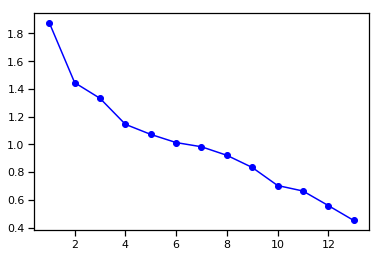

In [590]:
plt.plot(range(1,14),pca_model.explained_variance_,'b-o')

In [602]:
no_show_group=pca_df.groupby('no_show').mean()
no_show_group.head()

,Gender,Scholarship,Hypertension,Diabetes,Neighbourhood,Alcoholism,Handcap,SMS_received,Age,wait_time,day_week_appt,day_week_sched,hour_of_day_sched
no_show,,,,,,,,,,,,,
0,0.648989,0.093903,0.204392,0.073837,31.258831,0.030417,0.022742,0.291334,37.790064,8.171526,2.857439,2.847780,10.676322
1,0.653882,0.115507,0.169004,0.064071,32.239034,0.030333,0.020297,0.438371,34.317667,14.912451,2.861419,2.868453,11.162597


scree plot suggests about 4 components

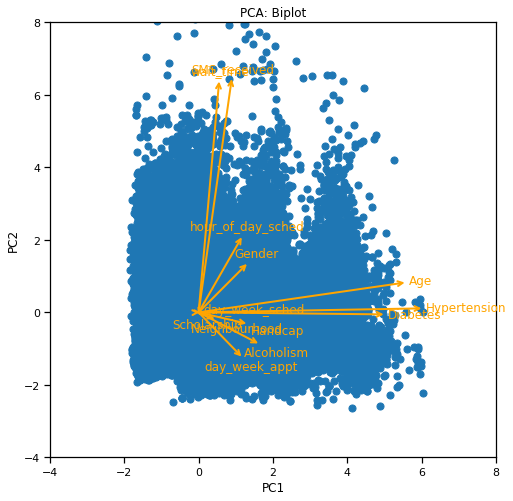

In [606]:
# Scatterplot of aggregated data
X = pca_model.transform(pca_df1)
plt.figure(figsize=(8,8))
plt.scatter(X[:,0], X[:,1], s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: Biplot')
plt.xlim(-4,8)
plt.ylim(-4,8)

# Add variable unit vector projections
V = pca_model.transform(np.identity(X.shape[1]))
for i, v in enumerate(V):
    plt.annotate(pca_df.columns[i], 
                 xy=(0,0), xytext=v[:2]*10, 
                 fontsize=12, color='orange',
                 arrowprops=dict(
                    arrowstyle='<-', linewidth=2, 
                    color='orange'))

# Add data point annotation
# for i, s in enumerate(no_show_group.index):
#     plt.annotate(s, xy=X[i,:2]+[0.1,-0.1], fontsize=15)

In [485]:
# build a PCA model to compare with the factor model above
pca_model = skd.PCA(n_components=4).fit(pca_df1)

# Show the principcal components
pd.DataFrame(pca_model.components_[:4,:].T, 
             index=pca_df.iloc[:,:13].columns,
             columns=['PC1', 'PC2','PC3','PC4'])

,PC1,PC2,PC3,PC4
Gender,0.097035,0.151347,-0.005438,-0.670871
Scholarship,-0.071209,-0.044485,-0.006843,-0.576248
Hypertension,0.609893,0.003448,-0.012104,-0.034213
Diabetes,0.508360,-0.016224,-0.015388,-0.042402
Neighbourhood,-0.020382,-0.053581,0.079091,-0.198342
Alcoholism,0.121201,-0.121533,0.000609,0.309542
Handcap,0.139184,-0.060456,-0.008760,0.125913
SMS_received,-0.018636,0.663302,0.093183,0.008519
Age,0.564720,0.078572,0.000917,0.025268
wait_time,-0.021390,0.656498,0.101586,0.076473


In [486]:
pca_model.components_.shape

(4, 13)

In [487]:
pca_model.score(pca_df1)

-18.15262619901683

# Part 4 - Classification of No-shows

In [498]:
g = pca_df.groupby('no_show')
g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
g = pca_df.groupby('no_show')
g = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))
pca_df=g

In [499]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(pca_df)

In [500]:
len(train)/len(data)
# len(test)/len(data)

0.30289431541614265

## Baseline - Patient always shows up

In [501]:
all_shows=[0]*len(test)

In [502]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test.no_show, all_shows)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 49.55%


## Random Forest

In [503]:
import sklearn.ensemble as skens

rf_model = skens.RandomForestClassifier(n_estimators=9,oob_score=False, criterion='gini')
rf_model.fit(train.iloc[:,:13], train.no_show)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [504]:
predicted_labels = rf_model.predict(test.iloc[:,:13])

In [505]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test.no_show,predicted_labels)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 64.96%


In [506]:
param_grid={
    'n_estimators':[5,10,15,20,25,35,50],
    'max_depth': [2,5,7,9, 12,15,None],

}

In [507]:
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(rf_model, param_grid,cv=10)
grid_clf.fit(train.iloc[:,:13], train.no_show)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20, 25, 35, 50], 'max_depth': [2, 5, 7, 9, 12, 15, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [508]:
grid_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [509]:
grid_clf.best_params_

{'max_depth': 15, 'n_estimators': 35}

In [633]:
rf_model = skens.RandomForestClassifier(n_estimators=35,max_depth=15, oob_score=False, criterion='gini')
rf_model.fit(train.iloc[:,:13], train.no_show)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [634]:
predicted_labels = rf_model.predict(test.iloc[:,:13])

In [635]:
%%time
predicted_labels = rf_model.predict(test.iloc[:,:13])

Wall time: 127 ms


In [559]:
accuracy = accuracy_score(test.no_show,predicted_labels)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 67.38%


In [513]:
grid_clf = GridSearchCV(rf_model, param_grid,cv=5)
grid_clf.fit(train.iloc[:,:13], train.no_show)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=12, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20, 25, 35, 50], 'max_depth': [2, 5, 7, 9, 12, 15, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [514]:
grid_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [515]:
grid_clf.best_params_

{'max_depth': 15, 'n_estimators': 50}

In [560]:
rf_model = skens.RandomForestClassifier(n_estimators=50,max_depth=15, oob_score=False, criterion='gini')
rf_model.fit(train.iloc[:,:13], train.no_show)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [561]:
accuracy = accuracy_score(test.no_show,predicted_labels)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 67.38%


## Random Forest with PCA

In [518]:
pca_model.fit(train.iloc[:,:13])
pca_train=pca_model.transform(train.iloc[:,:13])
pca_test=pca_model.transform(test.iloc[:,:13])

In [519]:
rf_model = skens.RandomForestClassifier(n_estimators=50,max_depth=9, oob_score=False, criterion='gini')
rf_model.fit(pca_train, train['no_show'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [520]:
predicted_labels = rf_model.predict(pca_test)

In [521]:
accuracy = accuracy_score(test.no_show,predicted_labels)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 67.33%


In [522]:
grid_clf = GridSearchCV(rf_model, param_grid,cv=10)
grid_clf.fit(train.iloc[:,:13], train.no_show)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20, 25, 35, 50], 'max_depth': [2, 5, 7, 9, 12, 15, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [523]:
grid_clf.best_params_

{'max_depth': 15, 'n_estimators': 50}

In [562]:
rf_model = skens.RandomForestClassifier(n_estimators=50,max_depth=15, oob_score=False, criterion='entropy')
rf_model.fit(pca_train, train['no_show'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [563]:
predicted_labels = rf_model.predict(pca_test)

In [564]:
accuracy = accuracy_score(test.no_show,predicted_labels)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 67.33%


In [527]:
grid_clf = GridSearchCV(rf_model, param_grid,cv=5)
grid_clf.fit(train.iloc[:,:13], train.no_show)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [5, 10, 15, 20, 25, 35, 50], 'max_depth': [2, 5, 7, 9, 12, 15, None]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [528]:
grid_clf.best_params_

{'max_depth': 15, 'n_estimators': 50}

In [629]:
rf_model = skens.RandomForestClassifier(n_estimators=50,max_depth=15, oob_score=False, criterion='entropy')
rf_model.fit(pca_train, train['no_show'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [630]:
predicted_labels = rf_model.predict(pca_test)

In [632]:
%%time
predicted_labels = rf_model.predict(pca_test)

Wall time: 157 ms


In [570]:
accuracy = accuracy_score(test.no_show,predicted_labels)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 67.46%


## SGD Classifier

In [532]:
train.head()

Gender  Scholarship  Hypertension  Diabetes  Neighbourhood  \
no_show                                                                     
1       9189        1            1             0         0             49   
        9324        1            1             0         0             62   
0       18988       1            0             0         0             68   
        4438        1            1             1         0             65   
        8621        0            1             0         0             45   

               Alcoholism  Handcap  SMS_received  Age  wait_time  \
no_show                                                            
1       9189            0        0             1   17       28.0   
        9324            1        0             1   30        7.0   
0       18988           0        0             0   31        0.0   
        4438            1        0             0   45        6.0   
        8621            0        0             0    5       22.0   

               day_week_appt  day_week_sched  hour_of_day_sched  no_show  
no_show                                                                   
1       9189               5               4                 10        1  
        9324               3               2                 15        1  
0       18988              2               1                 10        0  
        4438               5               5                 18        0  
        8621               5               3                  9        0

In [533]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(alpha=1e-02,max_iter=10,penalty='elasticnet',n_jobs=-1)
sgd.fit(train.iloc[:,:13],train.no_show)

SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=10, n_iter=None,
       n_jobs=-1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [534]:
predicted_labels=sgd.predict(test.iloc[:,:13])

In [535]:
%%time
predicted_labels=sgd.predict(test.iloc[:,:13])

Wall time: 4.99 ms


In [536]:
accuracy = accuracy_score(test.no_show,predicted_labels)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 56.15%


In [537]:
param_grid={
        'loss': ['hinge','log'],
        'penalty': ['elasticnet','none','l2'],
        'max_iter': [.001,.01,1],
        'alpha': [.001,.01,.1,1]

}

In [624]:
grid_clf = GridSearchCV(sgd, param_grid,cv=10)
grid_clf.fit(train.iloc[:,:13], train.no_show)

GridSearchCV(cv=10, error_score='raise',
       estimator=SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1, n_iter=None,
       n_jobs=-1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['hinge', 'log'], 'penalty': ['elasticnet', 'none', 'l2'], 'max_iter': [0.001, 0.01, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [625]:
grid_clf.best_params_

{'loss': 'log', 'max_iter': 1, 'penalty': 'elasticnet'}

In [636]:
sgd = SGDClassifier(alpha=.1,max_iter=1,penalty='elasticnet',n_jobs=-1,loss='log')
sgd.fit(train.iloc[:,:13],train.no_show)

SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1, n_iter=None,
       n_jobs=-1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [637]:
predicted_labels=sgd.predict(test.iloc[:,:13])

In [638]:
%%time
predicted_labels=sgd.predict(test.iloc[:,:13])

Wall time: 7.84 ms


In [628]:
accuracy = accuracy_score(test.no_show,predicted_labels)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 58.01%


In [538]:
grid_clf = GridSearchCV(sgd, param_grid,cv=5)
grid_clf.fit(train.iloc[:,:13], train.no_show)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=10, n_iter=None,
       n_jobs=-1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['hinge', 'log'], 'penalty': ['elasticnet', 'none', 'l2'], 'max_iter': [0.001, 0.01, 1], 'alpha': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [539]:
grid_clf.best_params_

{'alpha': 0.1, 'loss': 'hinge', 'max_iter': 1, 'penalty': 'elasticnet'}

In [571]:
sgd = SGDClassifier(alpha=.1,max_iter=1,penalty='elasticnet',n_jobs=-1,loss='hinge')
sgd.fit(train.iloc[:,:13],train.no_show)

SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1, n_iter=None,
       n_jobs=-1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [572]:
predicted_labels=sgd.predict(test.iloc[:,:13])

In [573]:
accuracy = accuracy_score(test.no_show,predicted_labels)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 56.23%


## SGD Classifier with PCA

In [543]:
pca_model.fit(train.iloc[:,:13])
pca_train=pca_model.transform(train.iloc[:,:13])
pca_test=pca_model.transform(test.iloc[:,:13])

In [574]:
sgd = SGDClassifier(alpha=.1,max_iter=1,penalty='elasticnet')
sgd.fit(pca_train, train['no_show'])

SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1, n_iter=None,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [575]:
predicted_labels = sgd.predict(pca_test)

In [576]:
%%time
predicted_labels = sgd.predict(pca_test)

Wall time: 1.96 ms


In [577]:
accuracy = accuracy_score(test.no_show,predicted_labels)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 60.40%


In [617]:
param_grid={
        'loss': ['hinge','log'],
        'penalty': ['elasticnet','none','l2'],
        'max_iter': [.001,.01,1]

}

In [618]:
grid_clf = GridSearchCV(sgd, param_grid,cv=10)
grid_clf.fit(train.iloc[:,:13], train.no_show)

GridSearchCV(cv=10, error_score='raise',
       estimator=SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1, n_iter=None,
       n_jobs=-1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['hinge', 'log'], 'penalty': ['elasticnet', 'none', 'l2'], 'max_iter': [0.001, 0.01, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [619]:
grid_clf.best_params_

{'loss': 'hinge', 'max_iter': 1, 'penalty': 'elasticnet'}

In [621]:
sgd = SGDClassifier(alpha=.1,max_iter=1,penalty='elasticnet',n_jobs=-1,loss='hinge')
sgd.fit(pca_train,train.no_show)

SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1, n_iter=None,
       n_jobs=-1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [622]:
predicted_labels = sgd.predict(pca_test)

In [623]:
accuracy = accuracy_score(test.no_show,predicted_labels)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 60.47%


In [549]:
grid_clf = GridSearchCV(sgd, param_grid,cv=5)
grid_clf.fit(train.iloc[:,:13], train.no_show)

GridSearchCV(cv=5, error_score='raise',
       estimator=SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=1, n_iter=None,
       n_jobs=1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'loss': ['hinge', 'log'], 'penalty': ['elasticnet', 'none', 'l2'], 'max_iter': [0.001, 0.01, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [550]:
grid_clf.best_params_

{'loss': 'log', 'max_iter': 1, 'penalty': 'elasticnet'}

In [651]:
sgd = SGDClassifier(alpha=.1,max_iter=1,penalty='elasticnet',n_jobs=-1,loss='log')
sgd.fit(pca_train,train.no_show)

SGDClassifier(alpha=0.1, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=1, n_iter=None,
       n_jobs=-1, penalty='elasticnet', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [652]:
predicted_labels = sgd.predict(pca_test)

In [653]:
%%time
predicted_labels = sgd.predict(pca_test)

Wall time: 1.5 ms


In [580]:
accuracy = accuracy_score(test.no_show,predicted_labels)
print("Accuracy: {0:.2%}".format(accuracy))

Accuracy: 61.28%
